In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("spark").getOrCreate()

In [ ]:
!git clone https://github.com/education454/admission_dataset

Cloning into 'admission_dataset'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 5.60 KiB | 5.60 MiB/s, done.


In [ ]:
!ls admission_dataset

Admission_Predict_Ver1.1.csv


In [ ]:
df=spark.read.csv('/content/admission_dataset/Admission_Predict_Ver1.1.csv',header=True,inferSchema=True)
df.show()

+---------+---------+-----------+-----------------+---+---+----+--------+---------------+
|Serial No|GRE Score|TOEFL Score|University Rating|SOP|LOR|CGPA|Research|Chance of Admit|
+---------+---------+-----------+-----------------+---+---+----+--------+---------------+
|        1|      337|        118|                4|4.5|4.5|9.65|       1|           0.92|
|        2|      324|        107|                4|4.0|4.5|8.87|       1|           0.76|
|        3|      316|        104|                3|3.0|3.5| 8.0|       1|           0.72|
|        4|      322|        110|                3|3.5|2.5|8.67|       1|            0.8|
|        5|      314|        103|                2|2.0|3.0|8.21|       0|           0.65|
|        6|      330|        115|                5|4.5|3.0|9.34|       1|            0.9|
|        7|      321|        109|                3|3.0|4.0| 8.2|       1|           0.75|
|        8|      308|        101|                2|3.0|4.0| 7.9|       0|           0.68|
|        9

In [ ]:
print((df.count(),len(df.columns)))

(500, 9)


In [ ]:
df.printSchema()

root
 |-- Serial No: integer (nullable = true)
 |-- GRE Score: integer (nullable = true)
 |-- TOEFL Score: integer (nullable = true)
 |-- University Rating: integer (nullable = true)
 |-- SOP: double (nullable = true)
 |-- LOR: double (nullable = true)
 |-- CGPA: double (nullable = true)
 |-- Research: integer (nullable = true)
 |-- Chance of Admit: double (nullable = true)



In [ ]:
df.describe().show()

+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|summary|        Serial No|         GRE Score|      TOEFL Score|University Rating|               SOP|               LOR|              CGPA|          Research|    Chance of Admit|
+-------+-----------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+-------------------+
|  count|              500|               500|              500|              500|               500|               500|               500|               500|                500|
|   mean|            250.5|           316.472|          107.192|            3.114|             3.374|             3.484| 8.576440000000003|              0.56| 0.7217399999999996|
| stddev|144.4818327679989|11.295148372354712|6.081867659564538|1.143511800759815|0.9910036207566072|0.92

**Data Cleaning**

In [ ]:
df=df.drop('Serial No')
df.show()

+---------+-----------+-----------------+---+---+----+--------+---------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR|CGPA|Research|Chance of Admit|
+---------+-----------+-----------------+---+---+----+--------+---------------+
|      337|        118|                4|4.5|4.5|9.65|       1|           0.92|
|      324|        107|                4|4.0|4.5|8.87|       1|           0.76|
|      316|        104|                3|3.0|3.5| 8.0|       1|           0.72|
|      322|        110|                3|3.5|2.5|8.67|       1|            0.8|
|      314|        103|                2|2.0|3.0|8.21|       0|           0.65|
|      330|        115|                5|4.5|3.0|9.34|       1|            0.9|
|      321|        109|                3|3.0|4.0| 8.2|       1|           0.75|
|      308|        101|                2|3.0|4.0| 7.9|       0|           0.68|
|      302|        102|                1|2.0|1.5| 8.0|       0|            0.5|
|      323|        108|                3

In [ ]:
for i in df.columns:
  print(i+":",df[df[i].isNull()].count())

GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR: 0
CGPA: 0
Research: 0
Chance of Admit: 0


In [ ]:
#correlation analysis
for col in df.columns:
  print("Correlation to chance of admit col for {} is {}".format(col,df.stat.corr('Chance of Admit',col)))

Correlation to chance of admit col for GRE Score is 0.8103506354632598
Correlation to chance of admit col for TOEFL Score is 0.7922276143050823
Correlation to chance of admit col for University Rating is 0.6901323687886892
Correlation to chance of admit col for SOP is 0.6841365241316723
Correlation to chance of admit col for LOR is 0.6453645135280112
Correlation to chance of admit col for CGPA is 0.882412574904574
Correlation to chance of admit col for Research is 0.5458710294711379
Correlation to chance of admit col for Chance of Admit is 1.0


In [ ]:
#feature selection
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=['GRE Score','TOEFL Score','CGPA'],outputCol='features')
output_data=assembler.transform(df)
output_data.show()

+---------+-----------+-----------------+---+---+----+--------+---------------+------------------+
|GRE Score|TOEFL Score|University Rating|SOP|LOR|CGPA|Research|Chance of Admit|          features|
+---------+-----------+-----------------+---+---+----+--------+---------------+------------------+
|      337|        118|                4|4.5|4.5|9.65|       1|           0.92|[337.0,118.0,9.65]|
|      324|        107|                4|4.0|4.5|8.87|       1|           0.76|[324.0,107.0,8.87]|
|      316|        104|                3|3.0|3.5| 8.0|       1|           0.72| [316.0,104.0,8.0]|
|      322|        110|                3|3.5|2.5|8.67|       1|            0.8|[322.0,110.0,8.67]|
|      314|        103|                2|2.0|3.0|8.21|       0|           0.65|[314.0,103.0,8.21]|
|      330|        115|                5|4.5|3.0|9.34|       1|            0.9|[330.0,115.0,9.34]|
|      321|        109|                3|3.0|4.0| 8.2|       1|           0.75| [321.0,109.0,8.2]|
|      308

In [ ]:
from pyspark.ml.regression import LinearRegression
final_data=output_data.select('features','Chance of Admit')
final_data.show()

+------------------+---------------+
|          features|Chance of Admit|
+------------------+---------------+
|[337.0,118.0,9.65]|           0.92|
|[324.0,107.0,8.87]|           0.76|
| [316.0,104.0,8.0]|           0.72|
|[322.0,110.0,8.67]|            0.8|
|[314.0,103.0,8.21]|           0.65|
|[330.0,115.0,9.34]|            0.9|
| [321.0,109.0,8.2]|           0.75|
| [308.0,101.0,7.9]|           0.68|
| [302.0,102.0,8.0]|            0.5|
| [323.0,108.0,8.6]|           0.45|
| [325.0,106.0,8.4]|           0.52|
| [327.0,111.0,9.0]|           0.84|
| [328.0,112.0,9.1]|           0.78|
| [307.0,109.0,8.0]|           0.62|
| [311.0,104.0,8.2]|           0.61|
| [314.0,105.0,8.3]|           0.54|
| [317.0,107.0,8.7]|           0.66|
| [319.0,106.0,8.0]|           0.65|
| [318.0,110.0,8.8]|           0.63|
| [303.0,102.0,8.5]|           0.62|
+------------------+---------------+
only showing top 20 rows



In [ ]:
train,test=final_data.randomSplit([0.7,0.3])
train.show()

+------------------+---------------+
|          features|Chance of Admit|
+------------------+---------------+
|[290.0,100.0,7.56]|           0.47|
|[290.0,104.0,7.46]|           0.45|
|  [293.0,97.0,7.8]|           0.64|
| [294.0,93.0,7.36]|           0.46|
| [294.0,95.0,7.64]|           0.49|
| [295.0,96.0,7.34]|           0.47|
| [295.0,99.0,7.65]|           0.57|
|[295.0,101.0,7.86]|           0.69|
| [296.0,95.0,7.54]|           0.44|
| [296.0,99.0,7.28]|           0.47|
| [297.0,96.0,7.43]|           0.34|
| [297.0,96.0,7.89]|           0.43|
| [297.0,99.0,7.81]|           0.54|
| [297.0,100.0,7.9]|           0.52|
| [298.0,92.0,7.88]|           0.51|
| [298.0,97.0,7.21]|           0.45|
| [298.0,98.0,8.03]|           0.34|
| [298.0,99.0,7.46]|           0.53|
|  [298.0,99.0,7.6]|           0.46|
|[298.0,100.0,7.95]|           0.58|
+------------------+---------------+
only showing top 20 rows



In [ ]:
models=LinearRegression(featuresCol='features',labelCol='Chance of Admit')
model=models.fit(train)

In [ ]:
print("coefficients:",model.coefficients)
print("intercept:",model.intercept)

coefficients: [0.0022444416573952834,0.0031615507809285297,0.1464682730515103]
intercept: -1.5836878719633865


In [ ]:
summary=model.summary
print(summary)
print("RMSE",summary.rootMeanSquaredError)
print("r2 score",summary.r2)

RMSE 0.061669873093829805
r2 score 0.8126257642743152


In [ ]:
predictions=model.transform(test)
predictions.show()

+------------------+---------------+-------------------+
|          features|Chance of Admit|         prediction|
+------------------+---------------+-------------------+
|  [295.0,93.0,7.2]|           0.46|0.42701820556544967|
| [295.0,99.0,7.57]|           0.37| 0.5001807712800794|
|  [296.0,97.0,7.8]|           0.49| 0.5297898141774653|
| [296.0,99.0,8.03]|           0.61| 0.5698006185411695|
|[296.0,101.0,7.68]|            0.6|  0.524859824534998|
| [297.0,98.0,7.67]|           0.59| 0.5161549311190925|
|[297.0,101.0,7.67]|           0.57| 0.5256395834618781|
|  [298.0,98.0,7.5]|           0.44| 0.4934997663577312|
|[298.0,105.0,8.54]|           0.69| 0.6679576257978013|
| [299.0,97.0,7.66]|           0.38| 0.5160175809224399|
|[299.0,100.0,7.42]|           0.42| 0.4903498477328625|
|[299.0,100.0,7.88]|           0.51| 0.5577252533365573|
|[299.0,100.0,7.89]|           0.59| 0.5591899360670725|
|[299.0,102.0,8.62]|           0.56|  0.672434876956532|
| [300.0,98.0,8.02]|           

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator=RegressionEvaluator(predictionCol='prediction',labelCol='Chance of Admit',metricName='r2')
print("r2 on test data",evaluator.evaluate(predictions))

r2 on test data 0.7833841513285122


In [ ]:
model.save("model")
from pyspark.ml.regression import LinearRegressionModel
model=LinearRegressionModel.load('model')

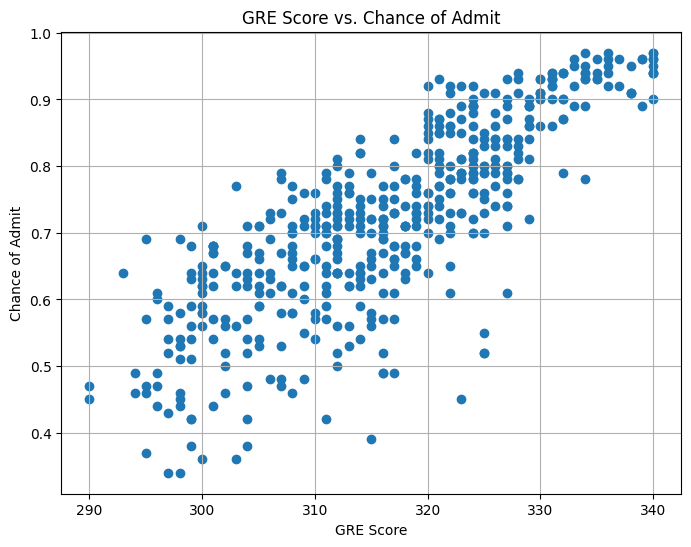

In [ ]:
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame for plotting
pandas_df = df.toPandas()

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pandas_df['GRE Score'], pandas_df['Chance of Admit'])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.title('GRE Score vs. Chance of Admit')
plt.grid(True)
plt.show()